<a href="https://colab.research.google.com/github/kiarashrahmani/MNIST-digit-detection-using-keras/blob/main/MNIST_digit_detection_using_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [2]:
from keras.datasets import mnist
(train_images_raw, train_labels_raw), (test_images_raw, test_labels_raw) = mnist.load_data()

In [3]:
train_images_raw.shape

(60000, 28, 28)

In [4]:
len(train_labels_raw)

60000

In [5]:
train_labels_raw

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images_raw.shape

(10000, 28, 28)

In [7]:
len(test_labels_raw)

10000

In [8]:
test_labels_raw

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [9]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense
from keras import activations

model = keras.Sequential()
model.add(Dense(256, activation=activations.relu, input_shape=(28*28,)))
model.add(Dense(10, activation='softmax'))

**The compilation step**

In [10]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Preparing the image data**

In [11]:
train_images = train_images_raw
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images = test_images_raw
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

train_labels = keras.utils.to_categorical(train_labels_raw)
test_labels = keras.utils.to_categorical(test_labels_raw)

**"Fitting" the model**

In [12]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 3ms/step - loss: 0.2984 - accuracy: 0.9150
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1320 - accuracy: 0.9619
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0889 - accuracy: 0.9743
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0663 - accuracy: 0.9804
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0514 - accuracy: 0.9851


**Evaluating the model on new data**

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0744 - accuracy: 0.9769
test_acc: 0.9768999814987183


**Using the model to make predictions**

In [14]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 65ms/step


array([4.6458888e-07, 1.3729561e-08, 5.2594740e-05, 1.1936893e-04,
       9.1071745e-10, 2.6754333e-07, 1.6162367e-10, 9.9980098e-01,
       5.4326972e-07, 2.5812758e-05], dtype=float32)

In [15]:
predictions[0].argmax()

7

In [16]:
predictions[0][7]

0.999801

In [17]:
test_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

**Displaying the fisrt digit**

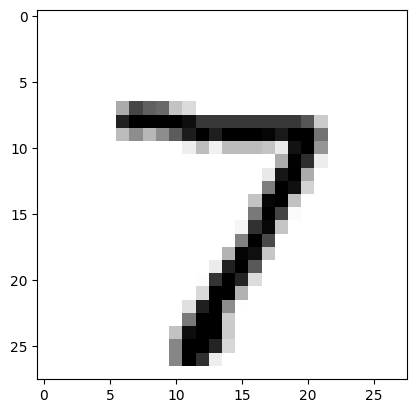

In [18]:
import matplotlib.pyplot as plt

digit = test_images_raw[0]
# digit
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()